In [191]:
import pandas as pd

df = pd.read_csv(r"C:\Users\lucas.carillo\Downloads\FurniturePricePrediction.csv")
display(df)

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


In [192]:
#primeiras 5 linhas do df
df.head()

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0


In [193]:
#últimas 5 linhas do df
df.tail()

,furniture,type,url,rate,delivery,sale,price
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0
1999,Comfy memory foam mattress,CIREM,https://www.jumia.com.eg//ar/cirem-comfy-medic...,0.0,172.14,10%,10775.0


In [194]:
#Calcula informações como média, desvio padrão, etc.

df.describe()

,rate,delivery,price
count,2000.000000,2000.000000,1961.000000
mean,0.743450,142.673285,2910.418195
std,1.611737,139.339128,4002.917206
min,0.000000,10.830000,13.400000
25%,0.000000,52.440000,740.000000
50%,0.000000,172.140000,1900.000000
75%,0.000000,172.140000,4000.000000
max,5.000000,2409.900000,55000.000000


In [195]:
#Informações do DF, notamos valores NAN no price

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [196]:
#Verifica a relação entre as variaveis

df.corr()

C:\Users\lucas.carillo\AppData\Local\Temp\ipykernel_13672\2066469063.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rate,delivery,price
rate,1.000000,-0.112733,-0.020497
delivery,-0.112733,1.000000,0.101149
price,-0.020497,0.101149,1.000000


In [197]:
#Verifica valores nulos - NAN é não forncecido

df.isnull().sum()

furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        39
dtype: int64

In [198]:
#Nota-se 39 valores NAN na coluna price

df['price'].isnull().sum()

39

In [203]:
#classe SimpleImputer do scikit-learn para preencher os valores ausentes na coluna "price" do df

from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df.price = imputer.fit_transform(df[["price"]])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   rate       2000 non-null   float64
 3   delivery   2000 non-null   float64
 4   sale       2000 non-null   object 
 5   price      2000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 93.9+ KB


In [200]:
df.drop(['url'], axis=1, inplace=True)

In [201]:
df["type"].value_counts()

Modern Home                                                           678
Rango                                                                  81
Marfy Touch                                                            57
General                                                                51
Artistico                                                              44
                                                                     ... 
Modern Home R        PCS                                                1
Epoch Sylvanian Families Ka     Shining room light                      1
Sprayer model coloring  art drawing                                     1
Rango Romantic Chair   Black                                            1
Casio Standard Analogue Ladys Standard Analog Women s LTP V   G  A      1
Name: type, Length: 592, dtype: int64

In [205]:
df['sale'] = df['sale'].str.replace('%', '') 
df['sale'] = df['sale'].astype(int)
df['sale']

0       72
1       54
2       18
3       58
4       54
        ..
1995     0
1996     0
1997     0
1998     9
1999    10
Name: sale, Length: 2000, dtype: int32

array([[<Axes: title={'center': 'rate'}>,
        <Axes: title={'center': 'delivery'}>],
       [<Axes: title={'center': 'sale'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

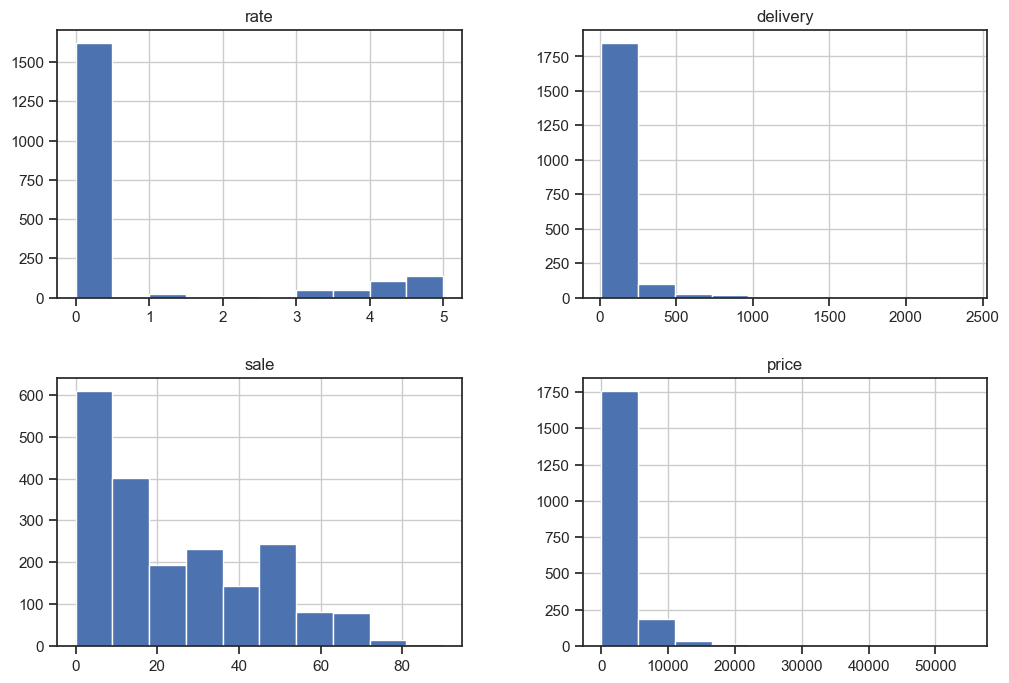

In [183]:
df.hist(figsize=(12,8))

<Axes: ylabel='price'>

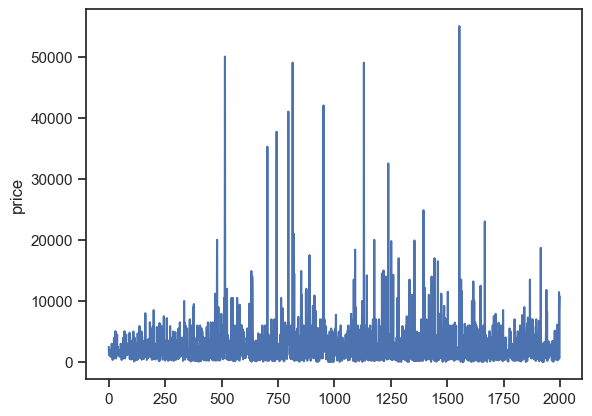

In [185]:
sns.lineplot(df["price"])

In [207]:
df["furniture"].nunique()

1224

In [208]:
df["type"].nunique()

592

In [215]:
from category_encoders import TargetEncoder

feature_cat = ["furniture", "type"]
target_encoder = TargetEncoder(cols=feature_cat)
data_temp = target_encoder.fit_transform(df[feature_cat],df["price"])

In [219]:
data_temp.head()

,furniture,type
0,2574.128948,2847.022840
1,2574.128948,2701.697412
2,2386.826865,2701.697412
3,2377.337947,2701.697412
4,2656.695707,2701.697412


In [221]:
df["furniture"] = data_temp["furniture"]
df["type"] = data_temp["type"]

In [222]:
df.head()

,furniture,type,rate,delivery,sale,price
0,2574.128948,2847.022840,3.3,172.14,72,2500.0
1,2574.128948,2701.697412,0.0,172.14,54,1200.0
2,2386.826865,2701.697412,0.0,172.14,18,1099.0
3,2377.337947,2701.697412,0.0,172.14,58,1200.0
4,2656.695707,2701.697412,5.0,52.44,54,1400.0


In [230]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

X = df.drop("price", axis=1) #pega todas as colunas, exeto a coluna price
y = df["price"] #pega a coluna price

#dividir o conjunto de dados em um conjunto de treinamento
#20% para teste e 80% no treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


ct = make_column_transformer(
    (MinMaxScaler(), ['furniture', 'type', 'rate', 'delivery', 'sale'])
)
ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [231]:
X_train.shape  #1600 linhas e 5 colunas

(1600, 5)

In [232]:
X_train[:5]

array([[0.03237515, 0.20282377, 0.        , 0.01734422, 0.11111111],
       [0.02883663, 0.20282377, 0.        , 0.01734422, 0.44444444],
       [0.07310865, 0.22500161, 0.        , 0.01734422, 0.54444444],
       [0.0580156 , 0.20282377, 0.        , 0.01734422, 0.34444444],
       [0.0944165 , 0.24281766, 0.        , 0.06723855, 0.        ]])

In [233]:
y_train.shape

(1600,)

In [247]:
y_train[:5]

968     506.0
240     999.0
819    2800.0
692    1950.0
420    4000.0
Name: price, dtype: float64

In [235]:
type(X_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [237]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [239]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8081045341921821

<Axes: xlabel='price'>

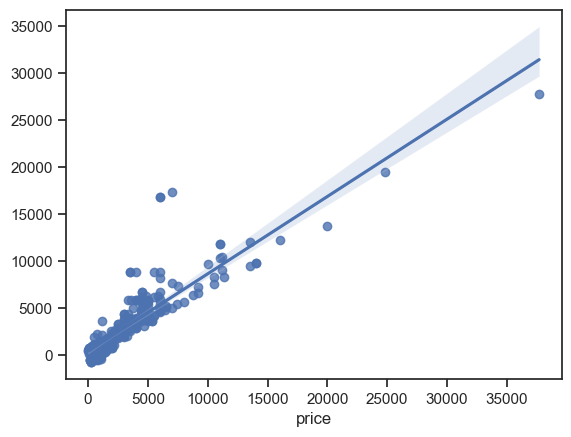

In [240]:
sns.regplot(x= y_test, y = y_pred)